In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import time
import plotly.graph_objs as go
import plotly.offline as py

import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv("Red Wine Quality (1).csv")

In [4]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
data.shape

(1599, 12)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


# Total Unique Values:

In [6]:
data.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

# Total Missing Values:

In [7]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Summary Statistics:

In [8]:
summary=data.describe().T
summary

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


# Exploratory Data Analysis:

# Univariate Analysis:

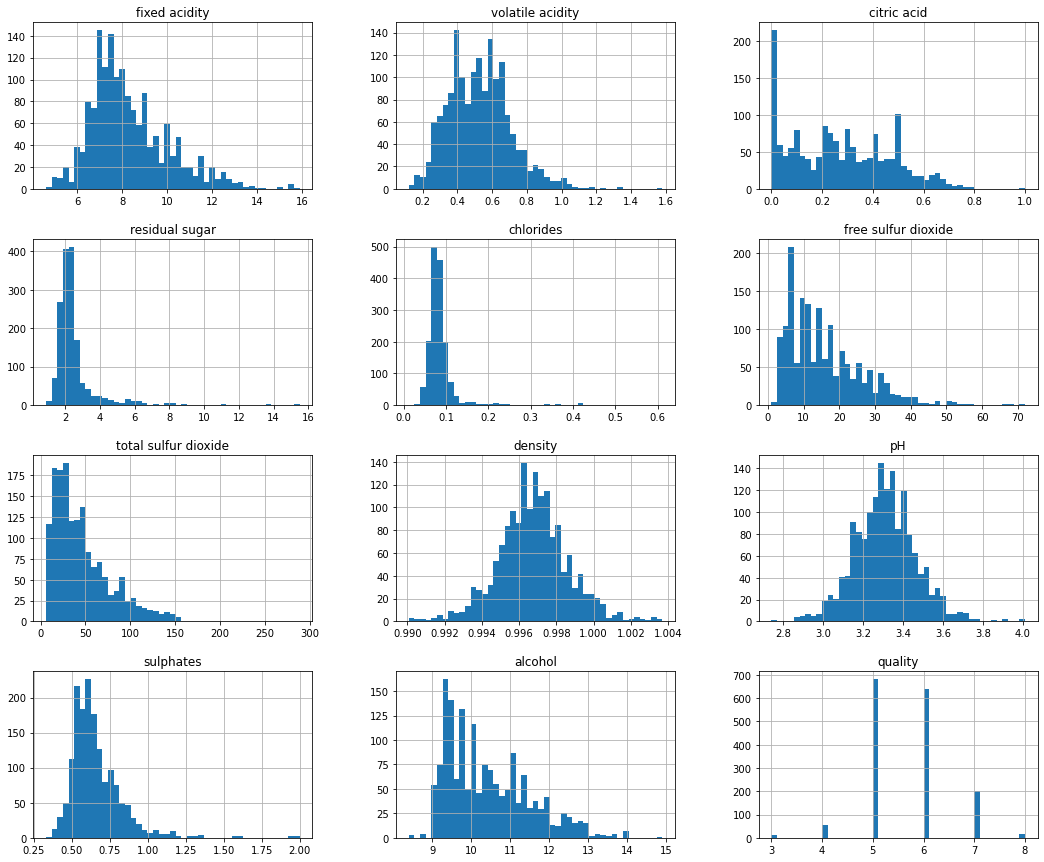

In [9]:
data.hist(bins = 45, figsize = (18,15))
plt.show()

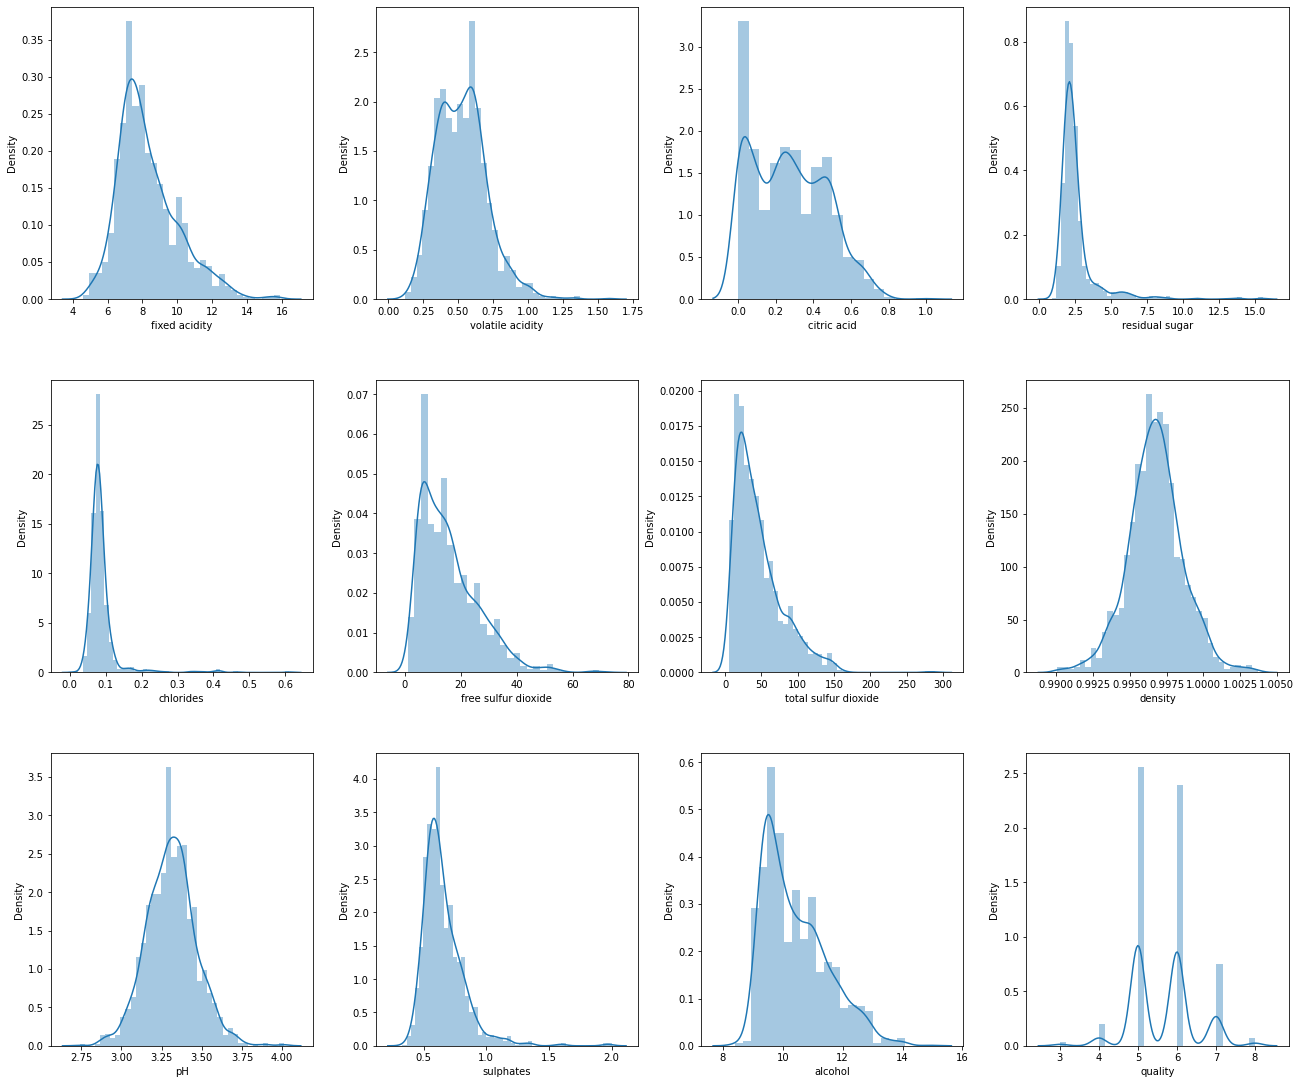

In [10]:
fig, ax = plt.subplots(ncols = 4, nrows = 3, figsize = (18,15))
index = 0
ax = ax.flatten()

for col, value in data.items():
    if col != 'type':
        sns.distplot(value, ax = ax[index])
        index += 1
plt.tight_layout(pad = 0.5, w_pad = 0.7, h_pad = 5.0)

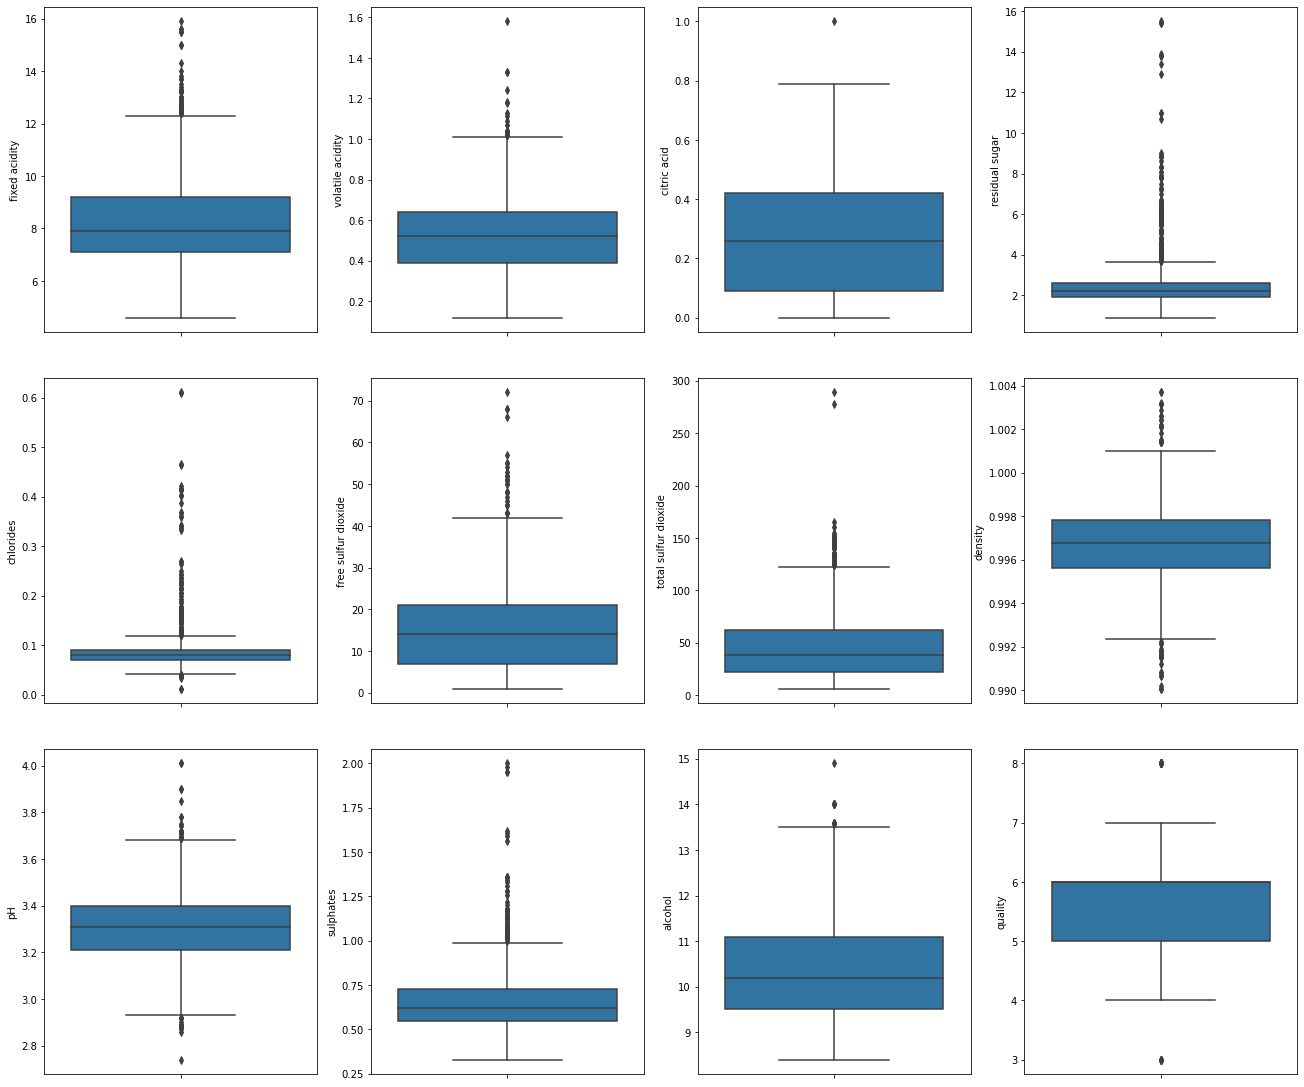

In [11]:
fig, ax = plt.subplots(ncols = 4, nrows = 3, figsize = (18,15))
index = 0
ax = ax.flatten()

for col, value in data.items():
    if col != 'type':
        sns.boxplot(y = col, data = data, ax = ax[index])
        index += 1
plt.tight_layout(pad = 0.3, w_pad = 0.4, h_pad = 4.0)

<AxesSubplot:xlabel='quality', ylabel='count'>

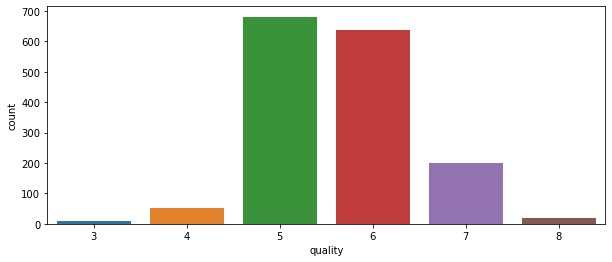

In [12]:
plt.figure(figsize=(10,4))
sns.countplot(data['quality'])

* Most people prefer the quality 5 and 6. 

# Bivariate Analysis:

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

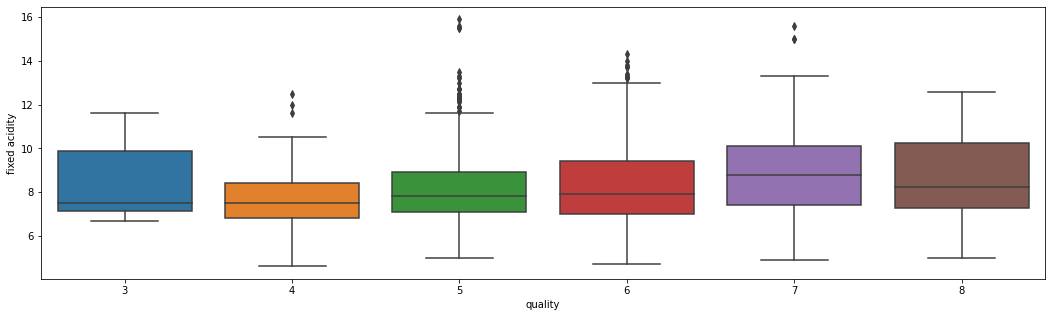

In [7]:
plt.figure(figsize=(18,5))
sns.boxplot(x='quality',y='fixed acidity',data=data)

* As fixed acidity increases the quality of wine is increases.

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

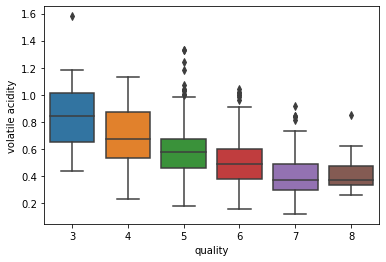

In [14]:
sns.boxplot(x='quality',y='volatile acidity',data=data)

* We see that as the quality of wine is increasing the median is decreasing at quality 7 and 8 the median is same means as the quality is increases the median is constant.

* Means as the volatitle acidity level decreases the quality of wine is increases.

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

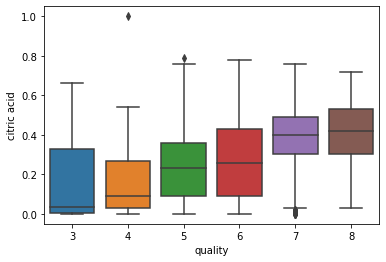

In [15]:
sns.boxplot(x='quality',y='citric acid',data=data)

* As the quantity of citric acid increases the quality of wine is also increases.

<AxesSubplot:xlabel='quality', ylabel='residual sugar'>

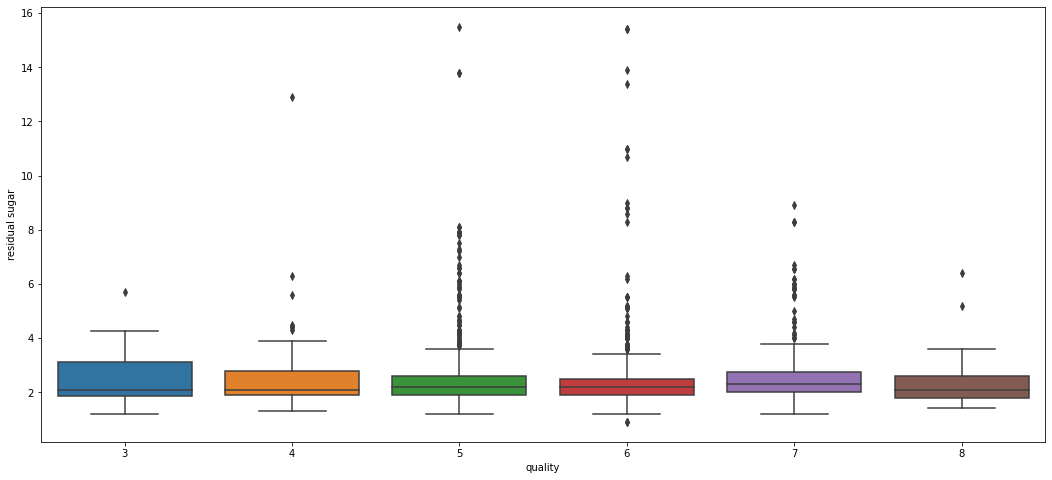

In [8]:
plt.figure(figsize=(18,8))
sns.boxplot(x='quality',y='residual sugar',data=data)

* We see that the residual sugar is didn't impact on quality of wine.

<AxesSubplot:xlabel='quality', ylabel='chlorides'>

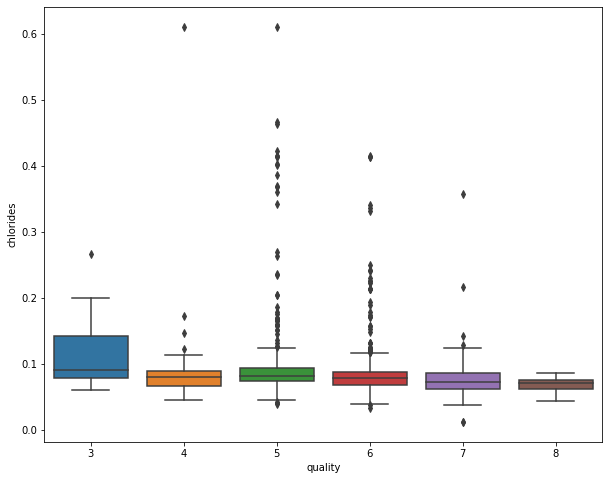

In [17]:
plt.figure(figsize=(10,8))
sns.boxplot(x='quality',y='chlorides',data=data)

* Chlorides also didn't impact on the quality of wine.

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

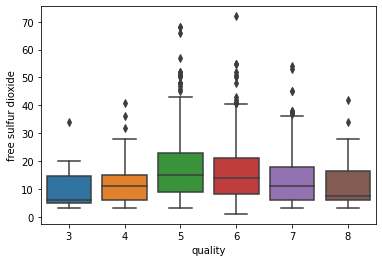

In [18]:
sns.boxplot(x='quality',y='free sulfur dioxide',data=data)

* As the quantity of free sulfur dioxide decreases the quality of wine is increases.

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

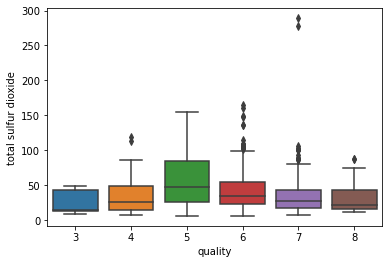

In [19]:
sns.boxplot(x='quality',y='total sulfur dioxide',data=data)

* AS the total sulfur dioxide decreases the quality of wine is increases.

<AxesSubplot:xlabel='quality', ylabel='density'>

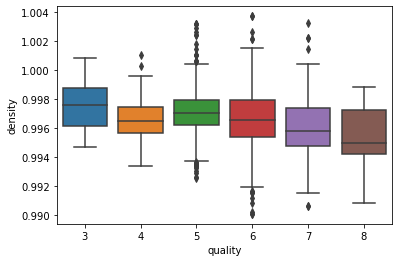

In [20]:
sns.boxplot(x='quality',y='density',data=data)

* The density of wine is increasing the quality of wine is increasing

<AxesSubplot:xlabel='quality', ylabel='pH'>

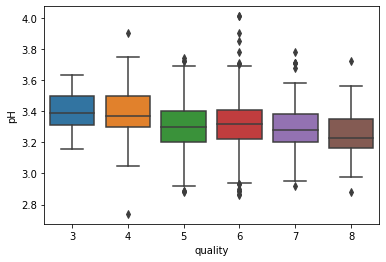

In [21]:
sns.boxplot(x='quality',y='pH',data=data)

* As the variations are in PH level then the quality of wine is good.

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

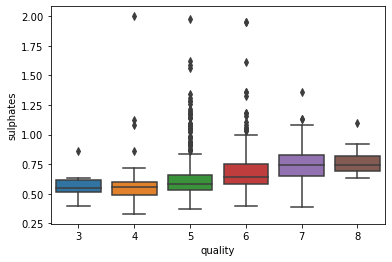

In [22]:
sns.boxplot(x='quality',y='sulphates',data=data)

* When quality level is at 0.80 then quality of wine is good, means as quantity of sulphates increases quality of wine is good.

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

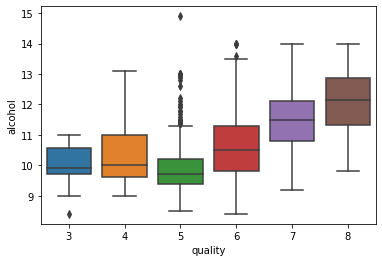

In [23]:
sns.boxplot(x='quality',y='alcohol',data=data)

* As the quantity of alcohol increases the quality of wine also increase.

# consider 3,4,5 as bad and quality 6,7,8 as good

In [24]:
data['quality'] = data['quality'].map({3 : 'bad', 4 :'bad', 5: 'bad',6: 'good', 7: 'good', 8: 'good'})

In [25]:
data['quality'].value_counts()

good    855
bad     744
Name: quality, dtype: int64

# Convert good bas as binary variable

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

data['quality'] = le.fit_transform(data['quality'])

In [27]:
data['quality'].value_counts()

1    855
0    744
Name: quality, dtype: int64

# Multivariate Analysis:

<AxesSubplot:xlabel='volatile acidity', ylabel='pH'>

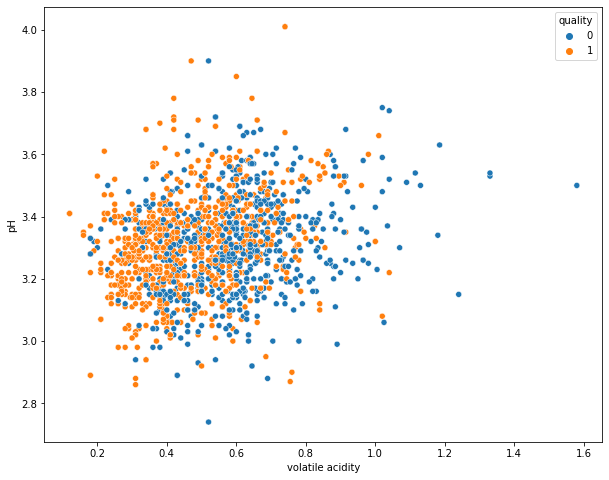

In [28]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='volatile acidity',y='pH',hue='quality',data=data)

* Wine quality is good when the volatile acidity is less than 1 and PH is lie between 3 to 3.6

<AxesSubplot:xlabel='fixed acidity', ylabel='pH'>

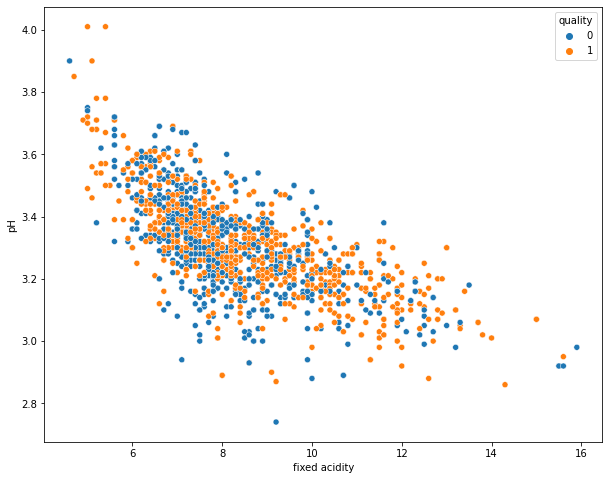

In [29]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='fixed acidity',y='pH',hue='quality',data=data)

* There is strong negative correlation between them means as the fixed acidity increases PH level is decreases and we get good quality of wine

<AxesSubplot:xlabel='citric acid', ylabel='pH'>

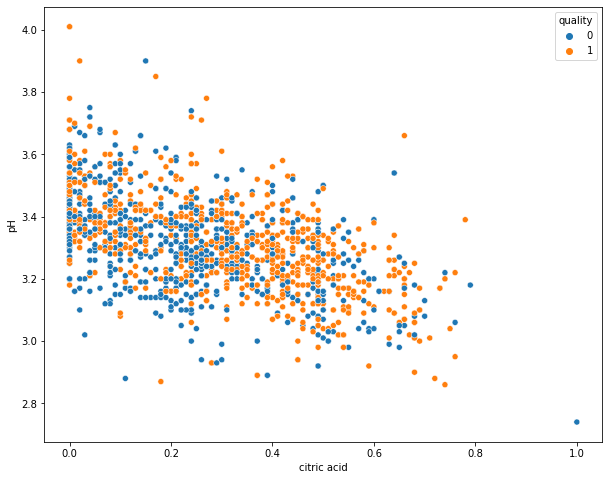

In [30]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='citric acid',y='pH',hue='quality',data=data)

<AxesSubplot:xlabel='residual sugar', ylabel='pH'>

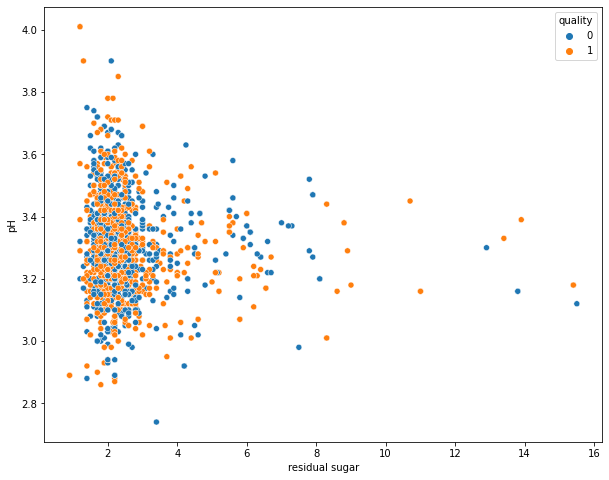

In [31]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='residual sugar',y='pH',hue='quality',data=data)

# Heatmap:

<AxesSubplot:title={'center':'Correlation of all the Columns'}>

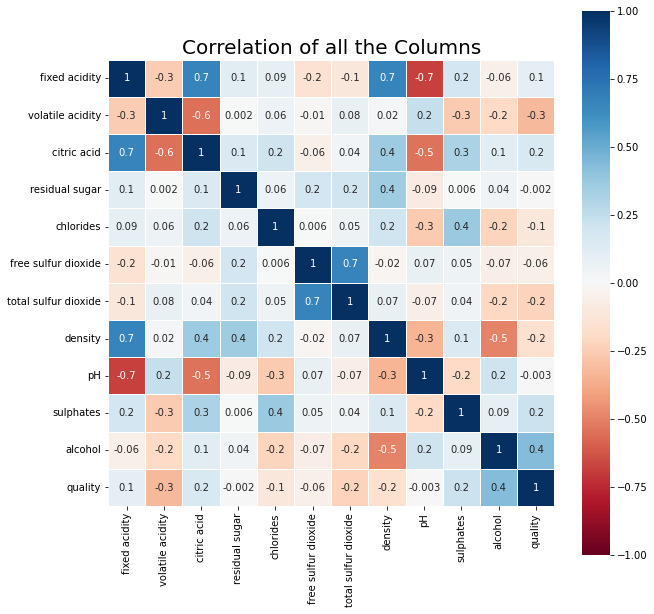

In [32]:
plt.figure(figsize = (10,10))
plt.title('Correlation of all the Columns', fontsize = 20)
sns.heatmap(data.corr(), annot = True, vmin = -1, vmax = 1, center = 0, fmt = '.1g', linewidths = 1, linecolor = 'white', 
            square = True, cmap ='RdBu')

In [33]:
data.drop(columns=['residual sugar','chlorides','pH'],inplace=True)

# Preprocessing Data:

In [34]:
X = data.drop('quality', axis = 1)
y = data['quality']

In [35]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y,stratify=y, test_size = 0.3, random_state = 42)

In [36]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test  = sc.transform(x_test)

In [37]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1119, 8)
(1119,)
(480, 8)
(480,)


# Modelling:

# 1) Logistic Regression:

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV, cross_val_score
lr = LogisticRegression()
lr.fit(x_train, y_train)

LogisticRegression()

In [40]:
y_pred_train = lr.predict(x_train)
y_pred_test  = lr.predict(x_test)

print("Training accuracy :", accuracy_score(y_pred_train, y_train))
print("Testing accuracy  :", accuracy_score(y_pred_test, y_test))

Training accuracy : 0.7515638963360143
Testing accuracy  : 0.725


# Confusion Matrix:

In [41]:
cm_test = confusion_matrix(y_test, y_pred_test)
print(cm_test)

[[156  57]
 [ 75 192]]


In [42]:
print('Classification report for train data is : \n',
      classification_report(y_train, y_pred_train))

print('\n')
print('Classification report for test data is : \n',
      classification_report(y_test, y_pred_test))

Classification report for train data is : 
               precision    recall  f1-score   support

           0       0.73      0.76      0.74       531
           1       0.77      0.75      0.76       588

    accuracy                           0.75      1119
   macro avg       0.75      0.75      0.75      1119
weighted avg       0.75      0.75      0.75      1119



Classification report for test data is : 
               precision    recall  f1-score   support

           0       0.68      0.73      0.70       213
           1       0.77      0.72      0.74       267

    accuracy                           0.73       480
   macro avg       0.72      0.73      0.72       480
weighted avg       0.73      0.72      0.73       480



# Decision Tree Classifier:

In [43]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
y_pred_dtc_train = dtc.predict(x_train)
y_pred_dtc_test  = dtc.predict(x_test)

print("Training accuracy :", accuracy_score(y_pred_dtc_train, y_train))
print("Testing accuracy  :", accuracy_score(y_pred_dtc_test, y_test))

Training accuracy : 1.0
Testing accuracy  : 0.71875


# Support Vector Classifier:

In [45]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train, y_train)

y_pred_svm_train = svm.predict(x_train)
y_pred_svm_test  = svm.predict(x_test)

print("Training accuracy :", accuracy_score(y_pred_svm_train, y_train))
print("Testing accuracy  :", accuracy_score(y_pred_svm_test, y_test))

Training accuracy : 0.6344950848972297
Testing accuracy  : 0.6416666666666667


# KNeighbors Classifier:

In [46]:
from sklearn.neighbors import KNeighborsClassifier

for i in range(1,5):
        neigh = KNeighborsClassifier(n_neighbors = i)
neigh.fit(x_train, y_train)

y_pred_knn_train = neigh.predict(x_train)
y_pred_knn_test  = neigh.predict(x_test)

print("Train Accuracy : ", accuracy_score(y_pred_knn_train, y_train))
print("Test Accuracy  : ", accuracy_score(y_pred_knn_test, y_test))

Train Accuracy :  0.7765862377122431
Test Accuracy  :  0.6145833333333334


# Random Forest Classifier:

In [47]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [48]:
y_pred_rfc_train = rfc.predict(x_train)
y_pred_rfc_test  = rfc.predict(x_test)

print("Training accuracy :", accuracy_score(y_pred_rfc_train, y_train))
print("Testing accuracy  :", accuracy_score(y_pred_rfc_test, y_test))

Training accuracy : 1.0
Testing accuracy  : 0.8


# Hyper parameter tunning:

In [49]:
model = SVC()
param = {'C': [0.01, 0.001, 0.0001, 0.1, 0.8, 0.9, 1 ,1.1 ,1.2 ,1.3 ,1.4], 
         'kernel':['linear', 'rbf'], 
         'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4] 
        }

grid_svc = GridSearchCV(model, 
                        param_grid = param, 
                        scoring = 'accuracy', 
                        cv = 5)

grid_svc.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.001, 0.0001, 0.1, 0.8, 0.9, 1, 1.1, 1.2,
                               1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [50]:
print("Best parameters for the model :", grid_svc.best_params_)
print("Best score for the model      :", grid_svc.best_score_)

Best parameters for the model : {'C': 1.4, 'gamma': 0.1, 'kernel': 'linear'}
Best score for the model      : 0.7543081358103781


In [51]:
svc_predict = grid_svc.predict(x_test)
print('Accuracy Score: ', accuracy_score(y_test, svc_predict))

Accuracy Score:  0.7208333333333333


In [52]:
params = {
    'n_estimators':[100, 200, 300, 400, 500], 
    'max_depth': [30, 40, 50], 
    'min_samples_leaf': [1, 2, 3], 
    'criterion': ["gini", "entropy"] 
}

from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
model = RandomForestClassifier(random_state = 42)
grid_search = GridSearchCV(estimator = model, 
                           param_grid = params, 
                           cv = 5, n_jobs = -1, verbose = 1, scoring = "accuracy")
grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [30, 40, 50],
                         'min_samples_leaf': [1, 2, 3],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='accuracy', verbose=1)

In [53]:
print("Best parameters for the model :", grid_search.best_params_)
print("Best score for the model      :", grid_search.best_score_)

Best parameters for the model : {'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 1, 'n_estimators': 300}
Best score for the model      : 0.807014734144779


In [54]:
train_rfc_pred = grid_search.predict(x_train)
test_rfc_pred  = grid_search.predict(x_test)

print("Train Accuracy : ",accuracy_score(y_train, train_rfc_pred))
print("Test Accuracy  : ",accuracy_score(y_test, test_rfc_pred))

Train Accuracy :  1.0
Test Accuracy  :  0.7833333333333333


In [55]:
print('Classification report for train data is : \n',
      classification_report(y_train, train_rfc_pred))

print('\n')
print('Classification report for test data is : \n',
      classification_report(y_test, test_rfc_pred))

Classification report for train data is : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       531
           1       1.00      1.00      1.00       588

    accuracy                           1.00      1119
   macro avg       1.00      1.00      1.00      1119
weighted avg       1.00      1.00      1.00      1119



Classification report for test data is : 
               precision    recall  f1-score   support

           0       0.76      0.74      0.75       213
           1       0.80      0.82      0.81       267

    accuracy                           0.78       480
   macro avg       0.78      0.78      0.78       480
weighted avg       0.78      0.78      0.78       480



# ROC Curve:

In [56]:
!pip install scikit-learn
from sklearn.metrics import roc_auc_score 
roc_auc = roc_auc_score(y_test, grid_search.predict_proba(x_test)[:,1])
print('Aera under ROC cure :',roc_auc)

Aera under ROC cure : 0.8721052909215593


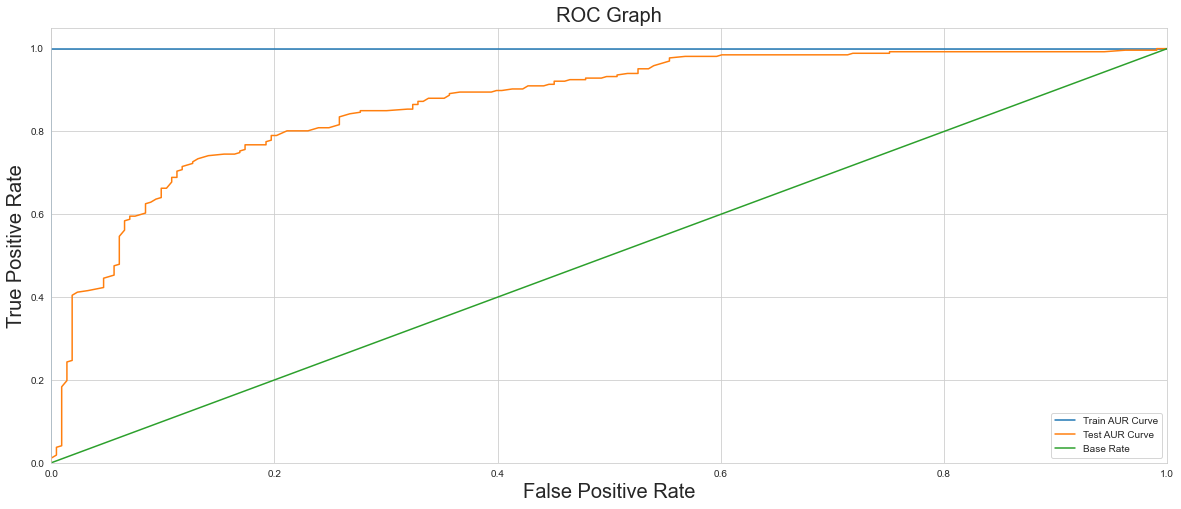

In [57]:
from sklearn.metrics import roc_curve
FPR_rfc_train, TPR_rfc_train, Thresholds_train = roc_curve(y_train, grid_search.predict_proba(x_train)[:,1])
FPR_rfc_test, TPR_rfc_test, Thresholds_test = roc_curve(y_test, grid_search.predict_proba(x_test)[:,1])
from sklearn.metrics import roc_curve

sns.set_style("whitegrid")
plt.figure(figsize = (20,8))

plt.plot(FPR_rfc_train, TPR_rfc_train, label = 'Train AUR Curve')
plt.plot(FPR_rfc_test, TPR_rfc_test,   label = 'Test AUR Curve')
plt.plot([0,1], [0,1], label = 'Base Rate')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize = 20)
plt.ylabel('True Positive Rate',  fontsize = 20)
plt.title('ROC Graph', fontsize = 20)
plt.legend(loc = "lower right")
plt.show()

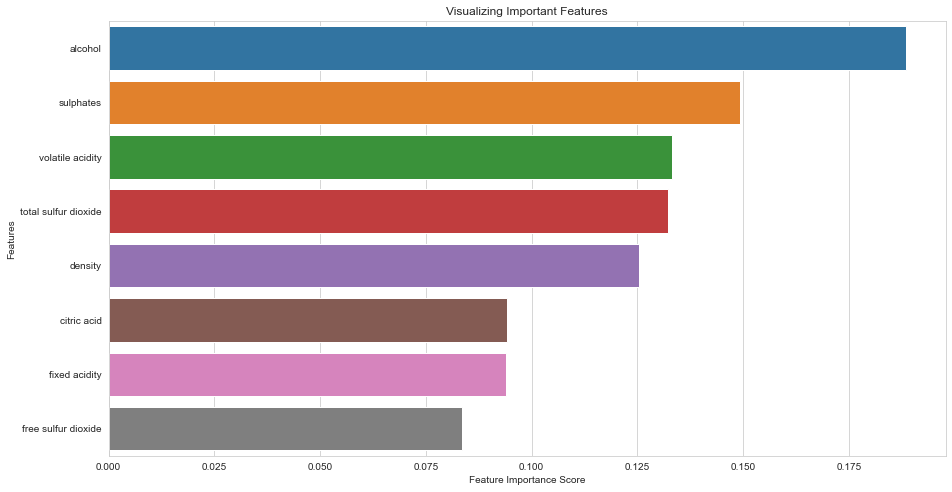

In [58]:
importance = grid_search.best_estimator_.feature_importances_
feature_imp = pd.Series(importance, index = data.columns[:8]).sort_values(ascending = False)
feature_imp
plt.figure(figsize = (15, 8))
# Visualize the Importance Creating a bar plot
sns.barplot(x = feature_imp, y = feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [59]:
import pickle
pickle.dump(grid_search, open('wine_grid_search.pkl','wb'))

model = pickle.load(open('wine_grid_search.pkl','rb'))

# Conclusion:

* we can clearly see that the alcohol has come out to be the most significant in this model. interesting it is very much aligned to the natural intution that alcohol plays major role in prediction of wine quality.
* other than the alcohol, sulphates and volatile acidity has played major role which is favor of the natural intution. Similarly total sulfur dioxide and density is also played quit significant role in prediction of wine quality.
